# DIGIT RECOGNIZER (#2)

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/CV/Projects/Digit_Recognizer

/content/drive/MyDrive/Colab_Notebooks/CV/Projects/Digit_Recognizer


In [ ]:
pwd

'/content/drive/MyDrive/Colab_Notebooks/CV/Projects/Digit_Recognizer'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
import time

## Data

### Training Data

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.shape

(42000, 785)

In [ ]:
X_train = df_train.iloc[:,1:] #features
y_train = df_train.iloc[:,0]  #labels

In [ ]:
def show_data(X, n=5, height=28, width=28, title=""):
  plt.figure(figsize=(10, 3))
  for i in range(n):
    ax = plt.subplot(1, n, i+1)    
    plt.imshow(X.iloc[i].values.reshape((height, width)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.suptitle(title, fontsize = 20)

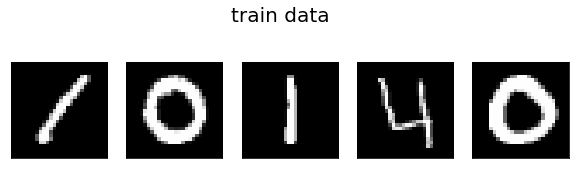

In [ ]:
show_data(X_train, title="train data")

### Testing Data

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.shape

(28000, 784)

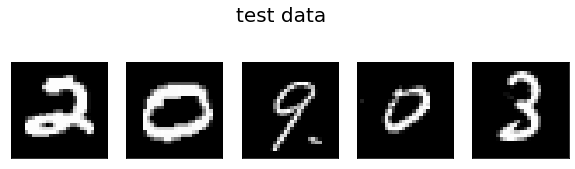

In [ ]:
show_data(df_test, title="test data")

## Dimensionality Reduction using PCA

### Train Data

In [ ]:
# STEP-1: Apply standard scaling
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)

In [ ]:
# STEP-2: PCA 
## Step i - Find Covariance Matrix
## Step ii - Find Eigen Values and Eigen Vectors
## Step iii - Transform Data
#noc = None
noc = idx
pca = PCA(n_components=noc)
X_train_trf = pca.fit_transform(X_train_scl)

In [ ]:
# Eigen Values (eval-1>eval-2>...>eval-n)
pca.explained_variance_.shape

(228,)

In [ ]:
# Eigen Vectors
pca.components_.shape

(228, 784)

#### Optimum no. of PCs (total explained variance should be at least 90%)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05747953, 0.09859644, 0.13642512, 0.16582374, 0.19138813,
       0.21368657, 0.2332121 , 0.25092815, 0.26655475, 0.28080431,
       0.2944144 , 0.3066398 , 0.31799717, 0.32912807, 0.33963118,
       0.34975443, 0.35926746, 0.36861261, 0.37768519, 0.38653847,
       0.39492754, 0.40304781, 0.41079942, 0.41832254, 0.42559944,
       0.432587  , 0.43949155, 0.44614078, 0.45244753, 0.45861055,
       0.46471977, 0.47069014, 0.47646297, 0.4821998 , 0.48784802,
       0.49331123, 0.49870554, 0.50394915, 0.50899758, 0.51388288,
       0.51870532, 0.52346433, 0.52806441, 0.53264069, 0.53713653,
       0.54160375, 0.54604212, 0.55041049, 0.55473762, 0.55900789,
       0.56320058, 0.56732239, 0.57134699, 0.57534133, 0.57929025,
       0.5831983 , 0.58699728, 0.59072182, 0.59440595, 0.59806318,
       0.60159596, 0.60510684, 0.60856097, 0.61197491, 0.61535276,
       0.61871752, 0.62203462, 0.62533187, 0.62853203, 0.63169979,
       0.63482674, 0.63794535, 0.64102748, 0.64406024, 0.64707

In [ ]:
idx = np.where(np.cumsum(pca.explained_variance_ratio_)>0.9)[0][0]
idx, np.cumsum(pca.explained_variance_ratio_)[idx]
#goto Dimensionality Reduction using PCA->Train Data and update 'noc' from 'None' to 'idx'

(228, 0.9004587915124619)

In [ ]:
# Transformed data
df_X_train_trf = pd.DataFrame(data=X_train_trf, columns=["PC{0}".format(i+1) for i in range(noc)])
df_X_train_trf['label'] = np.array(y_train)
df_X_train_trf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200,PC201,PC202,PC203,PC204,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,PC213,PC214,PC215,PC216,PC217,PC218,PC219,PC220,PC221,PC222,PC223,PC224,PC225,PC226,PC227,PC228,label
0,-5.140478,-5.226445,3.887001,-0.901512,4.929111,2.035413,4.706946,-4.767185,0.230956,-1.460961,0.830412,3.809805,-2.111898,-4.310872,-0.908254,3.597381,1.267100,1.345756,-0.405822,-1.363542,-2.212718,-1.282227,-1.390820,-1.033228,2.450588,-0.025290,0.543873,-2.181723,1.114705,-0.497225,-2.648173,-1.088607,-1.103603,-0.383444,1.415035,-0.210735,-0.074431,0.619728,1.810697,-0.329304,...,0.168293,0.964194,-0.576680,0.220692,-0.087440,0.258266,-0.215913,0.643569,-0.164441,-0.078123,-0.462680,-0.205426,0.025836,0.540837,0.418037,0.031059,-0.535936,-0.211532,-1.086052,-0.556738,-0.115878,-0.977214,0.269823,-0.444282,-0.711203,0.048937,-0.620270,0.039244,0.050765,-0.199124,0.740182,0.666353,0.022429,0.107682,-0.133442,0.552951,0.157444,0.240050,-0.457471,1
1,19.292332,6.032996,1.308148,-2.383294,3.095188,-1.791095,-3.772790,0.153865,-4.115194,-4.299359,-4.526441,-0.701391,-1.090896,-3.032519,2.555397,0.583158,-3.151531,-3.811109,0.078071,-0.228924,-2.413386,-3.397123,-0.212282,0.220924,-0.623972,-4.191459,0.001344,0.070024,-0.246799,-1.783701,-0.126368,1.831625,3.056228,2.459433,-1.526943,1.066342,1.763564,-1.105144,-0.601636,-1.160435,...,-0.135353,-0.269794,-0.296829,0.291002,-0.111439,-0.313229,-0.650871,-0.602914,0.651317,0.212251,0.264024,0.815382,-0.357146,0.092732,-0.791676,-0.599729,0.125312,0.032605,-0.941259,0.195100,-0.007302,-0.135688,0.145076,0.386537,0.236123,-0.105372,-0.016904,-0.165656,0.396522,0.056185,0.054746,-0.096291,-0.837613,-0.199609,-0.176596,0.776633,-0.556758,-0.045281,0.311111,0
2,-7.644503,-1.705813,2.289326,2.241135,5.094426,-4.152058,-1.012005,1.732559,0.436261,-0.073688,-0.707143,-3.006435,0.869830,3.171877,2.226074,0.358573,-1.009860,-0.524122,-0.084920,0.962155,-0.563182,-0.925738,2.307819,1.882156,-2.069944,-0.594124,1.129788,-1.538703,0.583788,0.248502,-1.188551,0.629189,0.692581,-0.141839,-0.983705,0.474066,0.512856,-0.886687,0.941561,0.034052,...,-0.159851,-0.081753,-0.293799,0.140874,0.019633,-0.068486,0.336181,-0.241491,0.134336,-0.048397,-0.134371,0.045876,0.085620,-0.036763,-0.572525,-0.189397,-0.269670,-0.555196,0.462789,0.678689,0.248989,0.021669,0.194537,-0.171430,-0.286329,0.170281,0.334759,0.266103,0.065955,-0.230723,-0.270758,-0.119114,0.284909,0.401602,-0.162319,-0.564476,0.406268,0.232858,0.041342,1
3,-0.474207,5.836139,2.008617,4.271106,2.377777,2.179912,4.398030,-0.353713,0.992296,5.501252,-4.482084,-2.991849,-0.959450,-1.853557,-2.932775,0.048466,0.069495,-0.057159,1.405609,-1.787947,-2.044403,1.099562,0.531746,0.489417,3.446862,-1.623484,0.844755,0.505632,0.655812,0.780207,1.171757,-0.913160,-1.482428,0.385096,1.150937,-1.112694,-2.176330,0.823374,0.227531,-1.951169,...,-0.453819,-1.116227,-0.646830,1.315490,0.069173,0.570739,0.713569,1.263232,-0.001002,1.677501,-0.843477,0.684725,1.787786,0.529685,0.590648,-0.376212,-0.594979,-0.503085,1.669839,0.272176,-0.734765,1.365219,-0.702761,0.796381,0.517554,-0.556749,-0.304658,-0.553179,0.190486,0.327571,0.198807,0.884863,0.399743,1.657744,0.593830,2.023371,-0.736713,-1.171800,-1.112010,4
4,26.559574,6.024818,0.933180,-3.012644,9.489178,-2.331196,-6.149597,-1.783637,-4.123300,-5.757359,0.034248,-0.532161,-0.314039,-2.497756,1.776822,0.980385,-0.505030,-2.023546,-0.018831,-1.043420,0.984436,0.842506,-0.868722,0.167571,-2.810002,-3.380975,1.239381,0.041821,-1.488055,-0.685658,1.310829,1.325090,2.274529,0.624242,-1.304363,2.653549,1.554647,-0.620065,-0.646471,-0.811135,...,-0.181693,0.305725,-0.802032,0.751152,-0.040554,-0.644727,-0.005783,-0.089611,0.523032,-0.302586,0.578506,0.683741,0.316945,-0.140247,-1.20

## Training using KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

### Test Data

In [ ]:
X_test_scl = scaler.transform(df_test)
X_test_trf = pca.transform(X_test_scl)

In [ ]:
df_X_test_trf = pd.DataFrame(data=X_test_trf, columns=["PC{0}".format(i+1) for i in range(noc)])
df_X_test_trf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200,PC201,PC202,PC203,PC204,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,PC213,PC214,PC215,PC216,PC217,PC218,PC219,PC220,PC221,PC222,PC223,PC224,PC225,PC226,PC227,PC228
0,11.661210,-4.660766,2.127181,5.140272,-0.705352,7.837994,1.284093,0.994795,-4.549169,-1.959158,0.710967,-5.588409,-0.782975,2.700642,-1.239399,-2.741348,-4.497896,0.966351,-0.447279,0.222255,5.323023,-4.876507,4.758378,-3.793409,0.536918,-0.162984,-0.418907,-0.096517,0.701578,3.523596,-0.569886,1.997169,2.137396,-1.146430,1.423189,1.873554,-0.613559,1.824985,-2.723620,1.015009,...,0.483115,-0.173145,2.126661,-0.053810,0.437785,-0.714616,0.142865,0.343575,0.636929,-0.932917,-0.775377,2.389400,0.247020,-0.728625,0.547471,0.493948,-0.485146,0.337042,0.819698,-0.587066,-0.028124,-1.719840,0.148351,-0.846319,-1.431215,0.013876,0.583157,0.924949,0.361349,-1.242711,-0.158573,-0.220002,-0.576120,0.721701,-0.359323,-0.828737,0.253961,0.754347,0.769660,-0.701384
1,18.342793,0.383411,-5.586561,1.238429,12.096280,-3.691923,-5.903195,0.114987,0.157853,-6.263524,5.127872,0.801132,1.005670,1.894814,-0.906352,-0.948385,3.116419,-1.286413,-1.265000,2.324070,1.213027,4.431239,-2.716073,-0.928427,0.468229,-1.709422,-0.318699,-0.153134,-0.738569,-2.551442,1.491218,0.015982,0.558309,-0.318715,1.972221,-0.326358,0.927758,2.460053,-0.337700,0.269600,...,1.118586,-0.019580,0.758459,0.191740,0.707871,-0.022285,0.667105,-0.508243,0.135944,1.183214,-0.119544,0.618633,0.251016,1.066424,-0.939777,-0.673637,-0.717402,-0.280054,-0.804567,0.718820,0.523490,0.426458,-0.525156,-0.145532,0.534279,0.216613,-0.650165,0.121408,-0.550324,0.510396,-0.152655,-0.600464,0.309801,-0.357511,0.945186,-0.319807,0.521258,0.183905,-0.604970,-0.571191
2,-5.263190,-0.358554,-0.905714,0.505248,2.208403,1.972671,0.181597,-2.673087,0.948420,2.062625,-5.410584,-3.317807,-0.340860,0.356033,-1.067657,-0.283463,2.109049,2.888191,0.849262,0.462015,0.607378,2.997696,-0.804466,-0.151110,0.025474,3.150998,0.467008,-0.808923,-1.158158,0.264372,2.056348,1.255561,-0.806476,2.596122,0.935230,0.772395,-0.668490,-0.017369,-1.308497,0.551223,...,1.320015,-0.050118,0.190325,-0.206898,-0.494807,-0.138963,0.665476,0.401017,0.576868,0.637706,0.122285,0.416434,-0.066127,0.473186,0.389966,1.330293,0.746018,0.454776,-0.004609,-0.116763,-0.064785,-0.852751,-0.292692,0.434336,-0.268979,0.084901,-0.151386,-0.542797,0.808030,-0.298798,-1.095328,-0.095134,-0.970426,-1.043848,0.225799,0.600327,0.306634,0.800783,-0.640169,-0.225528
3,-3.353480,-0.044316,-3.605964,6.186579,0.373882,1.901372,0.908639,0.406547,-1.468670,1.487682,-3.449227,0.333312,-2.970117,-1.969824,-2.752860,-1.110296,-1.126003,0.986217,1.015808,0.049155,2.004142,-1.641420,1.185453,0.104427,1.328741,-0.255055,2.727779,0.208235,1.367674,-0.069158,1.160753,-0.681897,1.350335,0.997630,0.122597,-0.506492,-0.637666,1.476536,-1.199861,-1.241046,...,-0.757665,0.053469,-0.577030,-0.616059,0.130481,1.026915,1.355289,0.114221,0.028230,-0.326188,0.478458,0.179026,1.368809,-0.553400,0.309708,0.036209,-0.233334,0.325071,1.013102,0.487857,0.062565,0.152261,0.154852,-0.655471,-0.488904,0.515820,-0.625350,-0.029620,0.807420,-0.934359,0.133940,0.084494,-0.056067,-0.161754,-0.365402,-0.380353,-1.192301,0.482702,-0.534003,-0.171317
4,-1.669952,-3.238903,7.410453,1.037868,-1.629644,-0.273604,0.698800,2.720042,-6.050800,-1.173031,0.094734,3.750096,-0.136052,-3.528094,3.760523,-2.311598,2.336763,-0.919377,-0.990823,-2.074429,-1.481447,3.785458,-3.045417,-2.145037,-1.641149,-1.980816,-0.543347,-0.239179,-0.148307,-1.285366,0.536781,0.179378,-0.364115,0.262492,1.923373,-0.524693,-1.825844,1.568011,0.342084,-0.038280,...,0.357000,0.127750,0.296840,0.114465,0.983107,0.072963,0.264559,-0.148459,0.033825,-0.410548,0.471043,0.256907,0.815496

## Prediction

In [ ]:
X_test_trf = np.array(df_X_test_trf)
start_time = time.time()
y_pred = knn.predict(X_test_trf)
end_time = time.time()
y_pred, (end_time - start_time)

(array([2, 0, 9, ..., 3, 9, 2]), 37.477686643600464)

In [ ]:
df_submission = pd.read_csv('sample_submission.csv')
df_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [ ]:
df_submission['Label'] = y_pred
df_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
#df_submission.to_csv('submission.csv', index=False)

### Accuracy Score

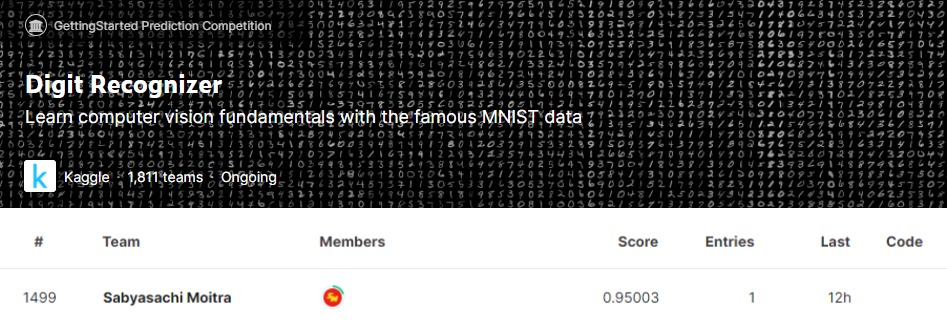